##### Import libraries

In [10]:
# !pip install more_itertools
# !pip install wordcloud

  Using cached more_itertools-9.0.0-py3-none-any.whl (52 kB)


In [203]:
import glob
import os
import string
from more_itertools import unique_everseen

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##### Read data

In [204]:
path = "inputs/"
all_files = glob.glob(os.path.join(path , "*.csv"))

# Read all videos
li = []
for filename in all_files:
    df_video = pd.read_csv(filename)
    df_video["VIDEO"] = filename.split('-')[1].split('.')[0] 
    li.append(df_video)

# Create one unique dataframe
df = pd.concat(li, axis=0, ignore_index=True)

# Move column "VIDEO" in fist position
first_column = df.pop('VIDEO')
df.insert(0, 'VIDEO', first_column)

In [205]:
df

,VIDEO,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,Psy,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,Psy,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,Psy,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,Psy,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,Psy,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...,...
1951,Shakira,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
1952,Shakira,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
1953,Shakira,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
1954,Shakira,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


#### Data repartition

In [206]:
## classes équilibrées donc pas de pb pour notre modèle de ML

df.CLASS.value_counts(normalize=True)

1    0.513804
0    0.486196
Name: CLASS, dtype: float64

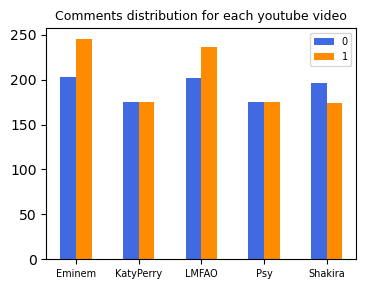

In [207]:
df_plt = df.groupby(['VIDEO', 'CLASS'])['CLASS'].count()

plt.figure(figsize=(4, 3))

videos_label = list(unique_everseen(df_plt.index.get_level_values('VIDEO')))
pos_x = np.arange(len(videos_label))
width = 0.25 

df_axis0 = df_plt[df_plt.index.get_level_values('CLASS') == 0]
plt.bar(pos_x - width/2, df_axis0.values, width, color = 'royalblue')

df_axis1 = df_plt[df_plt.index.get_level_values('CLASS') == 1]
plt.bar(pos_x + width/2, df_axis1.values, width, color = 'darkorange')

plt.xticks(pos_x, videos_label, fontsize=7)
plt.title('Comments distribution for each youtube video', fontsize=9)
plt.legend(set(df_plt.index.get_level_values('CLASS')), loc=1, fontsize=7)

plt.show()

#### Cleaning

In [208]:
from wordcloud import WordCloud

In [209]:
content_str = df["CONTENT"].map(str).values.astype('str')
content_str = ' '.join(content_str)

(-0.5, 999.5, 599.5, -0.5)

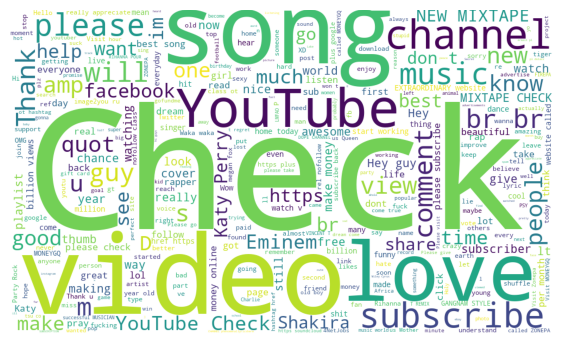

In [210]:
wc = WordCloud(background_color="white", 
               max_words=350, 
               width=1000, 
               height=600, 
               random_state=1).generate(content_str)

plt.figure(figsize=(7,7))
plt.imshow(wc)
plt.axis("off")

#### Feature Engineering

In [211]:
## length of a comment : in general, the length of a spam is longer than a real comment
df["CONTENT_LENGTH"] = df["CONTENT"].apply(lambda x: len(x))

## punctuation rate
def count_punctuation(row):
    i = 0
    row = row.replace(" ", "")
    for element in row:
        if element in string.punctuation : i += 1 #set of all punctuations
    return i/len(row)

df["PUNCT_RATE"] = df["CONTENT"].apply(lambda x: count_punctuation(x))

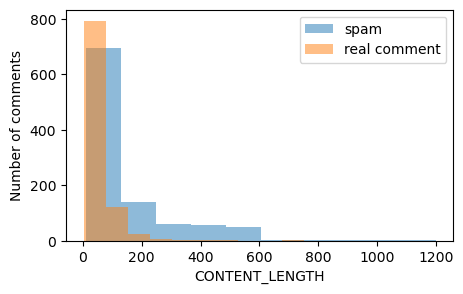

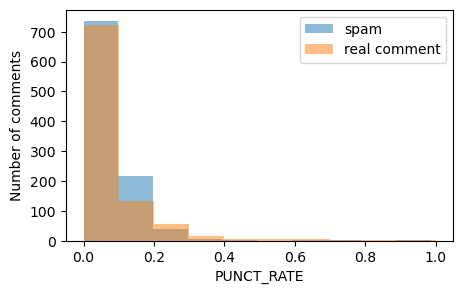

In [212]:
for col in ["CONTENT_LENGTH", "PUNCT_RATE"]:
    plt.figure(figsize=(5,3))
    plt.hist(df[df["CLASS"]==1][col], alpha=0.5, label="spam") #alpha for transparency
    plt.hist(df[df["CLASS"]==0][col], alpha=0.5, label="real comment")
    plt.xlabel(col)
    plt.ylabel("Number of comments")
    plt.legend()
    plt.show()

La variable CONTENT_LENGTH a un pouvoir prédictif comme on peut voir sur le graphique correspondant, les histogrammes ne se superposent pas contrairement au taux de ponctuation

#### Training

In [213]:
# Train/Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[["CONTENT", "CONTENT_LENGTH"]],
    df["CLASS"],
    test_size = 0.2,
    random_state = 42
)

In [214]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train["CONTENT"])
X_test_vect = vectorizer.transform(X_test["CONTENT"])

In [215]:
## visualisation de X_train_vect
df_X_train = pd.DataFrame(X_train_vect.toarray(), columns = vectorizer.get_feature_names_out())

## concaténation X_train_vect et la variable CONTENT_LENGTH
X_train_final = pd.concat([X_train[["CONTENT_LENGTH"]].reset_index(drop=True),
                          df_X_train],
                          axis=1
                         )

In [ ]:
## visualisation de X_train_vect
df_X_test = pd.DataFrame(X_test_vect.toarray(), columns = vectorizer.get_feature_names_out())

## concaténation X_train_vect et la variable CONTENT_LENGTH
X_test_final = pd.concat([X_test[["CONTENT_LENGTH"]].reset_index(drop=True),
                          df_X_test],
                          axis=1
                         )

#### Modelisation

In [218]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_final, y_train) ## j'ai modifié X_train_vect par X_train_final pour intégrer la variable CONTENT_LENGTH

RandomForestClassifier(random_state=42)

In [219]:
rf.score(X_test_final, y_test) ### pareil j'ai modifié X_test_vect par X_test_final

0.951530612244898

#### Accuracy Precision

In [222]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf.predict(X_test_final))) ## j'ai modifié X_test_vect par X_test_final

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       176
           1       0.98      0.94      0.96       216

    accuracy                           0.95       392
   macro avg       0.95      0.95      0.95       392
weighted avg       0.95      0.95      0.95       392



#### Cross validation pour avoir une performance moyenne

In [1]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train_final, y_train, cv=3)
print(scores)
print(np.mean(scores))
print(np.median(scores))

NameError: name 'rf' is not defined

#### Evaluation

In [223]:
inference_comment = "hey subscribe to my youtube channel please ! have fun"

In [226]:
## concaténation X_train_vect et la variable CONTENT_LENGTH
inference = pd.concat(
    [
    pd.DataFrame({"CONTENT_LENGTH": [len(inference_comment)]}),
    pd.DataFrame(vectorizer.transform([inference_comment]).toarray(), columns = vectorizer.get_feature_names_out())
    ],
    axis=1
)

In [225]:
rf.predict(inference_comment)

C:\Users\EmilieCHHEAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'hey subscribe to my youtube channel please ! have fun'

array([0], dtype=int64)